In [22]:
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics

import scipy
import json
import pickle
import pandas as pd
import tuner_library
import utilities as util
import matplotlib.pyplot as plt

In [32]:
def getRmse1(actual_preds, target_preds):
    rmse_val = 0
    for x in range(len(actual_preds)):
        rmse_val += (float(target_preds[x])- actual_preds[x])*(float(target_preds[x]) - actual_preds[x])
    #print(rmse_val)
    rmse_val = float(rmse_val)/len(target_preds)
    return rmse_val

In [24]:
#ask user to input the name of classes and store it in classNames as a json
class_names = ['negative', 'positive']
class_names = json.dumps(class_names)

#converting json to array object which will be used by the code further
class_names = json.loads(class_names)
print(class_names)

#get the text from the user in the string form(not json)


['negative', 'positive']


In [25]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)


In [26]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(df[0], df[1])

In [27]:
import sklearn.feature_extraction
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(train_features)
test_vectors = vectorizer.transform(test_features)

In [28]:
from sklearn.linear_model import LogisticRegression
rf = LogisticRegression()
rf.fit(train_vectors, train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(test_labels, pred, average='binary')
getRmse1(test_labels.tolist(), pred.tolist())

0.21907514450867052

In [8]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [9]:
import pickle
pickle.dump(c, open("model.pkl", 'wb'))

In [11]:
i = 200
text = df[0][i]
text

'oversexed , at times overwrought comedy drama that offers little insight into the experience of being forty , female and single'

In [12]:
from tuner_library import tuner
tl = tuner(text,'model.pkl', class_names)
result = util.JsonToArray(tl.get_Prediction()) 
result

HII


array([[0.43084572, 0.56915428]])

In [13]:
#ask user to input the value of sigma and store it in sigma as a json
sigma = 25
sigma = json.dumps(sigma)

#converting json to array object which will be used by the code further
sigma = json.loads(sigma)
sigma

25

In [14]:
#get the explanation for a particular sigma (all the explanation fields are filled)
exp = tl.get_Explanation(sigma)
print(exp.rf_score)
exp.save_to_file('explanation_25.html')

sigma = 25
0.0008808742979759085


In [15]:
k = 0.39062499968
tl.sigmas = k*2**np.arange(13)

In [16]:
for sigma in tl.sigmas:
    exp = tl.get_Explanation(sigma)    

sigma = 0.39062499968
sigma = 0.78124999936
sigma = 1.56249999872
sigma = 3.12499999744
sigma = 6.24999999488
sigma = 12.49999998976
sigma = 24.99999997952
sigma = 49.99999995904
sigma = 99.99999991808
sigma = 199.99999983616
sigma = 399.99999967232
sigma = 799.99999934464
sigma = 1599.99999868928


In [17]:
#for plotting entropy v/s sigma curve
sigmas, entropies = tl.get_Sigma_Entropy()
#get the rmse values(all the explanation models) for all the sigmas 
sigmas,constant_rmse, linear_rmse, decisionTree_rmse, randomForest_rmse = tl.get_RMSEs_And_Sigmas()

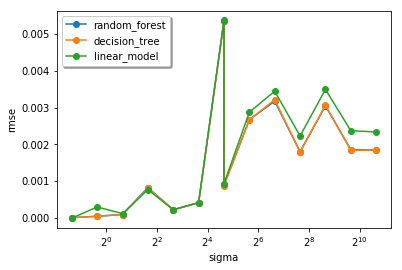

In [18]:
#plot the sigma v/s rmses 
axes=plt.gca()

plt.xscale('log', basex = 2)
plt.xlabel("sigma")
plt.ylabel("rmse");

plt.plot(sigmas, randomForest_rmse,'-o',label = 'random_forest')
plt.plot(sigmas, decisionTree_rmse,'-o',label = 'decision_tree')
plt.plot(sigmas, linear_rmse,'-o', label = 'linear_model')
# plt.plot(width, constant_rmse,'-o',label = 'constant_model')
# plt.suptitle('Example id = ' + str(idx))

legend = plt.legend(loc='upper left', shadow=True)

legend.get_frame()

#plot the sigma v/s rmses 
# axes=plt.gca()

# plt.xscale('log', basex = 2)
# plt.xlabel("sigma")
# plt.ylabel("rmse");

# plt.plot(sigmas[0:4], randomForest_rmse[0:4],'-o',label = 'random_forest')
# plt.plot(sigmas[0:4], decisionTree_rmse[0:4],'-o',label = 'decision_tree')
# plt.plot(sigmas[0:4], linear_rmse[0:4],'-o', label = 'linear_model')
# plt.plot(sigmas[0:4], constant_rmse[0:4],'-o',label = 'constant_model')
# # plt.suptitle('Example id = ' + str(idx))

# legend = plt.legend(loc='upper left', shadow=True)

# legend.get_frame()

1599.99999868928


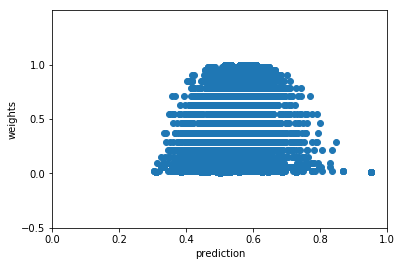

In [19]:
#for plotting weight distribution of neighbourhood points for a particular sigma
weights, predictions = tl.get_Weight_Distribution_Plot_Per_Sigma(25)

#plot the weight distribution of neighbour points for a particular sigma
axes=plt.gca()
plt.ylabel("weights")
plt.xlabel("prediction");
plt.ylim(-0.5, 1.5)
major_ticks = np.arange(-0.5, 1.5, 0.5)
axes.set_yticks(major_ticks) 
plt.xlim(0,1)
print(sigma)
plt.plot(predictions, weights,'o')

In [20]:

print(tl.getRange_Constant_Model())
print(tl.getRange_Linear_Model())

[0.39, 0.39062499968]
[0.39062499968, 24.99999997952]


In [21]:
print(linear_rmse)
print(constant_rmse)

[1.3872566733367687e-11, 0.00030157156099441747, 0.0001221932405272968, 0.0007711812711700287, 0.00022690687048879075, 0.0004177384940263503, 0.005352035529754463, 0.000933332260468427, 0.002874100566530436, 0.0034425850179561597, 0.002227470862051852, 0.0034898289478955073, 0.002373376843328537, 0.002336317749098311]
[1.387256675865316e-11, 0.0003237997953625878, 0.0006734065855761096, 0.0009053889074651009, 0.0014952902193566338, 0.0025501758934079514, 0.004290374734515873, 0.004201986602408324, 0.006142586905240841, 0.006864091276015882, 0.007264213618248783, 0.006944962516018685, 0.007397963275360616, 0.0072580515994994325]
